In [11]:
# importing
import pandas as pd

In [13]:
#1
with open('header.txt', 'r') as infile:
    labels=infile.read().rstrip('\n').split(';')
extractCols=['vehicleClass', 'make', 'deploymentDate', 'mileage(km)', 'fuelType', 'co2']
chunks=pd.read_csv('Tieliikenne Avoin Data 5.6.csv', chunksize=1000000,names=labels, sep=';', header=0, usecols=extractCols, encoding='latin')

#2
table=pd.concat([chunk[(chunk['vehicleClass']=='M1') | (chunk['vehicleClass']=='M1G')] for chunk in chunks])
table['deploymentDate']=list(map(str, table['deploymentDate']))
table['deploymentDate']=pd.to_datetime([x[0:4] for x in table['deploymentDate']], format='%Y', errors='coerce')
table['mileage(km)']=table['mileage(km)'].abs()
table['fuelType']=pd.to_numeric(table['fuelType'], errors='coerce')
table.dropna()


C:\Users\Mamun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,vehicleClass,deploymentDate,fuelType,make,co2,mileage(km)
6,M1,2003-01-01,1.0,Renault,143.0,128740.0
7,M1,2003-01-01,1.0,Honda,190.0,262295.0
8,M1,2006-01-01,1.0,Toyota,172.0,129052.0
9,M1,2007-01-01,2.0,Toyota,173.0,243920.0
13,M1,2003-01-01,1.0,Honda,196.0,215122.0
15,M1,2005-01-01,1.0,BMW,175.0,141984.0
17,M1G,2001-01-01,1.0,Hyundai,235.0,336904.0
21,M1,2003-01-01,1.0,Renault,164.0,190258.0
22,M1,2003-01-01,2.0,Volkswagen,132.0,502683.0
24,M1,2004-01-01,2.0,Volvo,215.0,332733.0


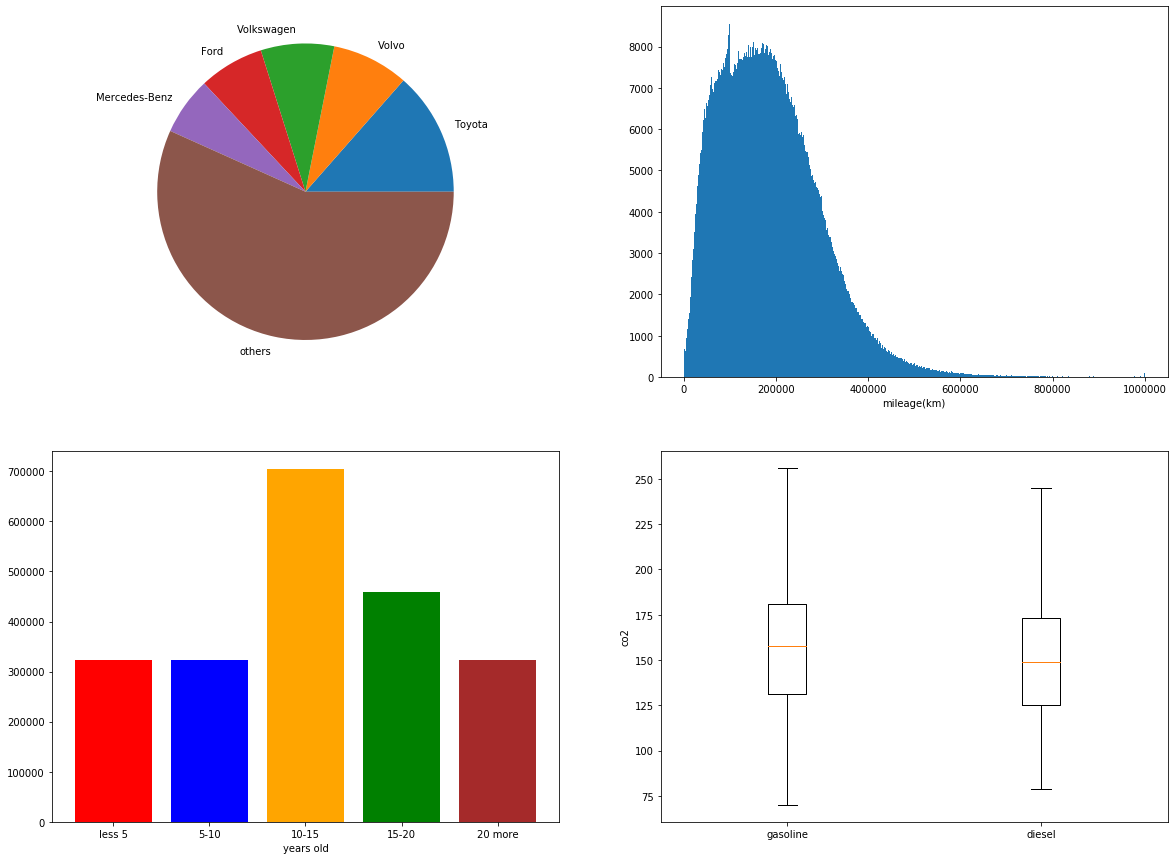

In [15]:
#3
import matplotlib.pyplot as plt
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20,15))


#pie chart
cnt= table['make'].value_counts()
x=list(cnt[:5])
x.append(sum(cnt[5:]))
y=list(cnt.index[:5])
y.append('others')
ax1.pie(x, labels=y)


#histogram
x=table[table['mileage(km)']<1000000]
ax2.hist(x['mileage(km)'], bins=1000)
ax2.set_xlabel('mileage(km)')

#bar
from datetime import datetime
x_5=len(table[table['deploymentDate']>=datetime(2014,1,1)])
x_5_10=len(table[(datetime(2014,1,1)>table['deploymentDate']) & (table['deploymentDate']>=datetime(2009,1,1))])
x_10_15=len(table[(datetime(2009,1,1)>table['deploymentDate']) & (table['deploymentDate']>=datetime(2004,1,1))])
x_15_20=len(table[(datetime(2004,1,1)>table['deploymentDate']) & (table['deploymentDate']>=datetime(1999,1,1))])
x_20=x_5_10=x_5=len(table[datetime(1999,1,1)>table['deploymentDate']])
ax3.bar(x=['less 5','5-10','10-15','15-20','20 more'], height=[x_5,x_5_10,x_10_15,x_15_20,x_20], color=['red', 'blue', 'orange', 'green', 'brown'])
ax3.set_xlabel('years old')

#boxplot
x_1=table[table['fuelType']==1]
x_2=table[table['fuelType']==2]
ax4.boxplot([x_1['co2'].dropna(), x_2['co2'].dropna()], showfliers=False, labels=['gasoline','diesel'])
ax4.set_ylabel('co2')

plt.savefig('vehstats.png')

